<a href="https://www.kaggle.com/code/behnambaloochy/spaceship-titanic?scriptVersionId=140644410" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

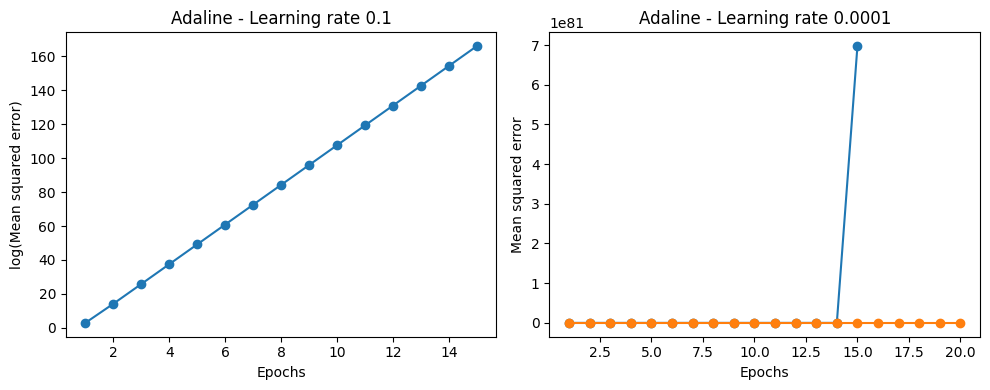

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
# Training Data Preprocessing
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', header=None, encoding='utf-8')
df = df.dropna(how="any")
# print(df.head(10))

y = df.iloc[1:, 13].values
y = np.where(y == 'True', 1, 0)
# print(y)

X = df.iloc[1:, [2, 5, 6, 7, 8, 9, 10, 11]].values
X[:,0] = np.where(X[:,0] == 'True', 1, 0)
X[:,2] = np.where(X[:,2] == 'True', 1, 0)
X = np.float_(X)
# print(X)
# standardize features
X_std = np.copy(X)
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()
X_std[:, 4] = (X[:, 4] - X[:, 4].mean()) / X[:, 4].std()
X_std[:, 5] = (X[:, 5] - X[:, 5].mean()) / X[:, 5].std()
X_std[:, 6] = (X[:, 6] - X[:, 6].mean()) / X[:, 6].std()
X_std[:, 7] = (X[:, 7] - X[:, 7].mean()) / X[:, 7].std()
# print(X_std)

# AdalineGD Machine Learning
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()

plt.show()

# Test Data Preprocessing
df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', encoding='utf-8')
df = df.dropna(how="any")
# print(df)
X = df.iloc[0:, [2, 5, 6, 7, 8, 9, 10, 11]].values
X[:,0] = np.where(X[:,0] == 'True', 1, 0)
X[:,2] = np.where(X[:,2] == 'True', 1, 0)
X = np.float_(X)
# print(X)
# standardize features
X_std = np.copy(X)
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()
X_std[:, 4] = (X[:, 4] - X[:, 4].mean()) / X[:, 4].std()
X_std[:, 5] = (X[:, 5] - X[:, 5].mean()) / X[:, 5].std()
X_std[:, 6] = (X[:, 6] - X[:, 6].mean()) / X[:, 6].std()
X_std[:, 7] = (X[:, 7] - X[:, 7].mean()) / X[:, 7].std()
# AdalineGD Prediction
result = ada_gd.predict(X_std)
# print(result)
trans = []
for i in result:
    trans.append(i==1)
submission = np.column_stack((df.PassengerId, trans))
# print(submission)

df1 = pd.DataFrame(submission)
df1.to_csv("/kaggle/working/submission.csv", header=['PassengerId', 'Transported'], index=False)
